# Hackathon

#Data Analysis on Electric Vehicle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df=pd.read_csv('/content/dataset.csv')

##About Data

In [6]:
df.shape

(110413, 17)

In [7]:
df.info

<bound method DataFrame.info of         VIN (1-10)     County        City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe    Key West    FL        33040        2022   
1       1G1RD6E45D      Clark    Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima      Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit    Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish     Everett    WA        98201        2019   
...            ...        ...         ...   ...          ...         ...   
110408  5YJSA1CN5D    Whatcom  Bellingham    WA        98225        2013   
110409  KNDC3DLC6N       King      Renton    WA        98058        2022   
110410  1N4AZ0CP4F       King  North Bend    WA        98045        2015   
110411  YV4BR0DM2M    Whatcom  Bellingham    WA        98225        2021   
110412  WP1AE2AY8N   San Juan   Eastsound    WA        98245        2022   

             Make       Model                   Electri

In [8]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  110413.000000  110413.000000   110413.000000  110413.000000   
mean    98157.902394    2019.003351       87.829350    1793.470470   
std      2623.593259       2.893099      102.348527   10796.464083   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         110135.000000    1.104130e+05       1.104120e+05  
mean              29.803623    1.994652e+08       5.296666e+10  
std               14.698282    9.395672e+07       1.701019e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484172e+08       5.303301e+10  
50%               34.000000    1.923996e+08       5.303303e+10  
75%               43.000000    2.191884e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [9]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [10]:
pip install plotly pandas

# Task1 (A)Univariate Analysis
Let's begin by visualizing a single variable - say, 'make'

###county

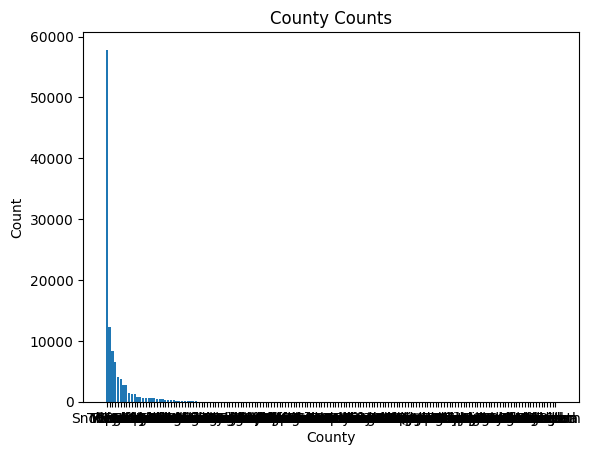

In [11]:
import plotly.express as px
county_counts =df['County'].value_counts()
plt.bar(county_counts.index, county_counts.values)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('County Counts')
plt.show()


In [12]:
top_types = df['County'].value_counts().nlargest(29).index
df['County_modified'] = df['County'].where(df['County'].isin(top_types), 'Other')
counts = df['County_modified'].value_counts()

In [13]:
counts

King            57840
Snohomish       12207
Pierce           8367
Clark            6555
Thurston         4056
Kitsap           3765
Whatcom          2774
Spokane          2731
Benton           1355
Island           1279
Skagit           1236
Other             760
Clallam           713
San Juan          703
Jefferson         681
Chelan            636
Yakima            601
Cowlitz           553
Mason             541
Lewis             425
Grays Harbor      394
Kittitas          380
Franklin          360
Grant             332
Walla Walla       308
Douglas           226
Whitman           173
Klickitat         172
Okanogan          147
Pacific           143
Name: County_modified, dtype: int64

In [14]:
fig = px.bar(counts, x=counts.index, y=counts.values, labels={'x': 'County', 'y': 'Count'},
             title='Top 10 ', text=counts.values, height=500)
fig.show()

###Top Citys

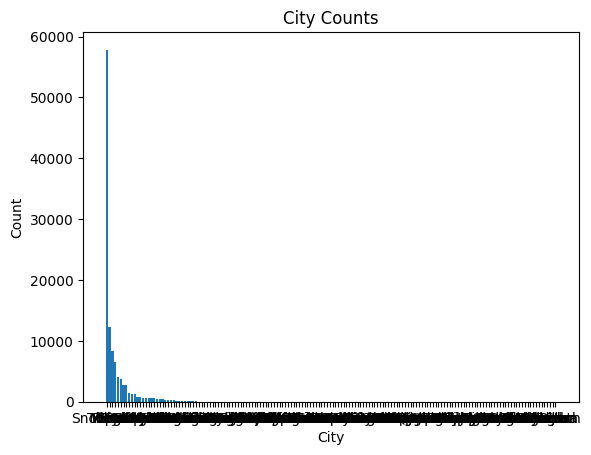

In [15]:
df["City"].value_counts()
City_counts =df['City'].value_counts()
plt.bar(county_counts.index, county_counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Counts')

plt.show()

In [16]:
top_types = df['City'].value_counts().nlargest(29).index
df['City_modified'] = df['City'].where(df['City'].isin(top_types), 'Other')
counts_city = df['City_modified'].value_counts()

In [17]:
counts_city

Other                34307
Seattle              19928
Bellevue              5785
Redmond               4108
Vancouver             3930
Kirkland              3526
Bothell               3280
Sammamish             3236
Renton                2718
Olympia               2699
Tacoma                2328
Bellingham            1909
Issaquah              1752
Spokane               1640
Mercer Island         1616
Kent                  1579
Woodinville           1559
Lynnwood              1452
Everett               1450
Snohomish             1301
Edmonds               1253
Gig Harbor            1243
Shoreline             1239
Bainbridge Island     1210
Auburn                1151
Camas                  998
Federal Way            836
Maple Valley           811
Bremerton              793
Seatac                 776
Name: City_modified, dtype: int64

In [19]:
fig_city = px.bar(counts_city, x=counts_city.index, y=counts_city.values, labels={'x': 'City', 'y': 'Counts_city'},
             title='Top Types Citys', text=counts.values, height=500)
fig_city.show()

###Make


In [20]:
df["Make"].value_counts()

TESLA             51074
NISSAN            12629
CHEVROLET          9961
FORD               5688
BMW                4584
KIA                4392
TOYOTA             4321
VOLKSWAGEN         2473
AUDI               2286
VOLVO              2235
CHRYSLER           1764
HYUNDAI            1392
JEEP               1126
RIVIAN              862
FIAT                813
PORSCHE             803
HONDA               776
MINI                617
MITSUBISHI          581
POLESTAR            548
MERCEDES-BENZ       497
SMART               265
JAGUAR              215
LINCOLN             164
CADILLAC            104
LUCID MOTORS         65
SUBARU               58
LAND ROVER           37
LEXUS                33
FISKER               20
GENESIS              17
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: Make, dtype: int64

In [21]:
top_types_Make = df['Make'].value_counts().nlargest(29).index
df['Make_modified'] = df['Make'].where(df['Make'].isin(top_types_Make), 'Other')
counts_Make = df['Make_modified'].value_counts()

In [22]:
fig = px.bar(counts, x=counts.index, y=counts.values, labels={'x': 'Make', 'y': 'counts_Make'},
             title='Top 10 Types Makers', text=counts.values, height=500)
fig.show()

###Models


In [23]:
df["Model"].value_counts()

MODEL 3        22680
MODEL Y        16825
LEAF           12629
MODEL S         7240
BOLT EV         4799
               ...  
745LE              2
S-10 PICKUP        1
SOLTERRA           1
918                1
FLYING SPUR        1
Name: Model, Length: 114, dtype: int64

In [24]:
top_types_model = df['Model'].value_counts().nlargest(29).index
df['Models_modified'] = df['Model'].where(df['Model'].isin(top_types_model), 'Other')
counts_models = df['Models_modified'].value_counts()

In [25]:
fig = px.bar(counts_models, x=counts_models.index, y=counts_models.values, labels={'x': 'Model', 'y': 'Counts_models'},
             title='Top 10 Models', text=counts.values, height=500)
fig.show()

###Electric Vehicle Type


In [26]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            84369
Plug-in Hybrid Electric Vehicle (PHEV)    26044
Name: Electric Vehicle Type, dtype: int64

Text(0.5, 1.0, 'Type of EV')

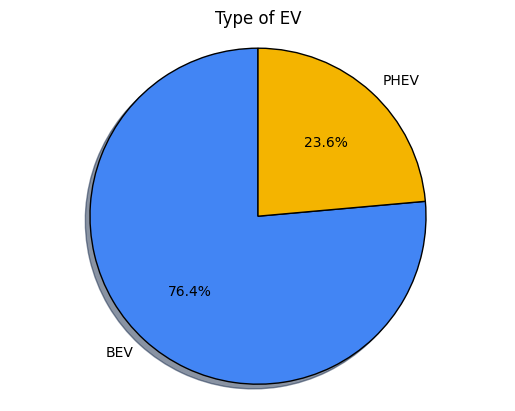

In [27]:
#Pie Chart for Type of EV
fig , ax = plt.subplots()
sizes = df['Electric Vehicle Type'].value_counts()
labels = 'BEV', 'PHEV'
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'black'},
        colors=['#4285F4',"#F4B400"])
ax.axis('equal')
ax.set_title('Type of EV')

###Clean Alternative Fuel Vehicle (CAFV) Eligibility

<Axes: ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

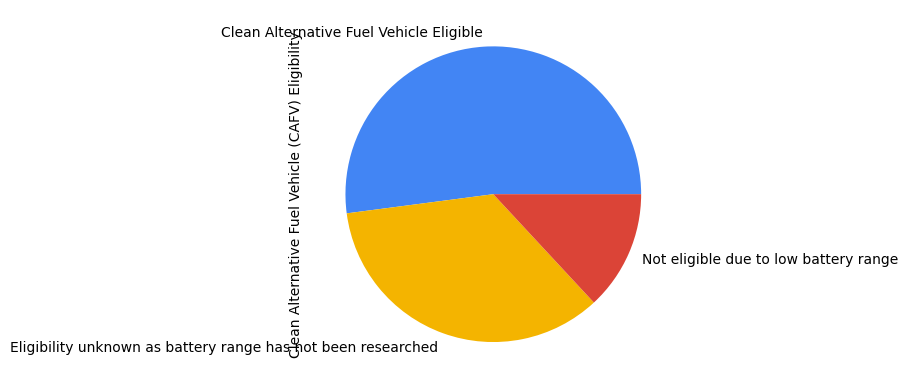

In [28]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie(  colors=['#4285F4',"#F4B400",'#DB4437'])

#(B)Bivariate Analysis
Let's begin by visualizing a Multiple variable - 'Models', "Years"

###Scatter Plot for Electric Range vs. Base MSRP:

In [29]:
fig = px.scatter(df, x='Electric Range', y='Base MSRP', title='Electric Range vs. Base MSRP')
fig.show()

###Plot for Model Year vs. Electric Range:**bold text**

In [30]:
fig = px.box(df, x='Model Year', y='Electric Range', title='Model Year vs. Electric Range')
fig.show()

###Violin Plot for Electric Vehicle Type vs. Base MSRP

In [32]:
fig = px.violin(df, x='Electric Vehicle Type', y='Base MSRP', title='Electric Vehicle Type vs. Base MSRP')
fig.show()

# Task2  - Create a Choropleth to display the number of EV vehicles based on location.

In [34]:
# Create a Choropleth map based on location (City, State) and the number of EV vehicles
ev_location_count = df.groupby(['City', 'State']).size().reset_index(name='EV Count')

# Load the U.S. state boundaries data for the Choropleth map
state_boundaries = px.data.election()

# Create the Choropleth map
fig = px.choropleth(
    ev_location_count,
    locations='State',                # Column with the state abbreviations (e.g., 'FL', 'NV', 'WA')
    locationmode='USA-states',        # Use USA states as the location mode
    color='EV Count',                 # Value to be color-mapped (Number of EV vehicles)
    scope="usa",                      # Set the scope to display only the USA map
    hover_name='City',                # Column with city names for hover information
    title='Number of EV Vehicles by Location',
    color_continuous_scale=px.colors.sequential.Plasma,  # Choose the color scale
)

# Update the layout to improve visualization
fig.update_layout(
    geo=dict(
        showcoastlines=True,          # Show coastlines on the map
        coastlinecolor="RebeccaPurple",  # Set the color for coastlines
        showland=True,                # Show land areas
        landcolor="LightGrey",        # Set the color for land areas
        showlakes=True,               # Show lakes on the map
        lakecolor="LightBlue",        # Set the color for lakes
    ),
)

# Show the Choropleth map
fig.show()


# Task3 - Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [36]:
pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.0 MB/s eta 0:00:00


In [38]:
import bar_chart_race as bcr
ev_make_count = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

In [40]:
fig = px.bar(
    ev_make_count,
    x='Make',
    y='Count',
    animation_frame='Model Year',
    animation_group='Make',
    range_y=[0, ev_make_count['Count'].max() + 10],
    title='EV Make Count Over the Years',
)

# Set the layout and labels for better visualization
fig.update_layout(
    xaxis_title='EV Make',
    yaxis_title='Count',
    showlegend=False,
    title_font_size=24,
)

# Show the Racing Bar Plot
fig.show()

In [39]:
# Assuming you have already processed the data and created 'ev_make_count' DataFrame

# Create the Racing Bar Plot
fig = px.bar(
    ev_make_count,
    x='Make',
    y='Count',
    animation_frame='Model Year',
    animation_group='Make',
    range_y=[0, ev_make_count['Count'].max() + 10],
    title='EV Make Count Over the Years',
)

# Customizing the style
fig.update_layout(
    xaxis_title='EV Make',
    yaxis_title='Count',
    showlegend=False,
    title_font_size=24,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set the background color to transparent
)

# Update the color and opacity of the bars
fig.update_traces(
    marker_color='rgb(31, 119, 180)',  # Set a custom color for the bars
    marker_line_color='rgb(8, 48, 107)',  # Set a custom color for the bar outlines
    marker_line_width=1.5,  # Adjust the width of the bar outlines
    opacity=0.8,  # Adjust the opacity of the bars
)

# Customize the font style and size
fig.update_layout(
    font=dict(
        family='Arial',  # Set the font family
        size=14,  # Set the default font size for the plot
        color='rgb(64, 64, 64)',  # Set the default font color
    ),
)

# Show the Racing Bar Plot
fig.show()

In [41]:
# Create the Racing Bar Plot with swapped 'x' and 'y'
fig = px.bar(
    ev_make_count,
    y='Make',  # Swap 'x' and 'y' here
    x='Count',  # Swap 'x' and 'y' here
    animation_frame='Model Year',
    animation_group='Make',
    range_x=[0, ev_make_count['Count'].max() + 10],  # Swap the range for x-axis
    title='EV Make Count Over the Years',
)

# Customizing the style
fig.update_layout(
    yaxis_title='EV Make',  # Update the y-axis title
    xaxis_title='Count',  # Update the x-axis title
    showlegend=False,
    title_font_size=24,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set the background color to transparent
)

# Update the color and opacity of the bars
fig.update_traces(
    marker_color='rgb(31, 119, 180)',  # Set a custom color for the bars
    marker_line_color='rgb(8, 48, 107)',  # Set a custom color for the bar outlines
    marker_line_width=1.5,  # Adjust the width of the bar outlines
    opacity=0.8,  # Adjust the opacity of the bars
)

# Customize the font style and size
fig.update_layout(
    font=dict(
        family='Arial',  # Set the font family
        size=14,  # Set the default font size for the plot
        color='rgb(64, 64, 64)',  # Set the default font color
    ),
)

# Show the Racing Bar Plot
fig.show()